In [119]:
import pandas as pd

In [120]:
# 读取数据
data = pd.read_csv("data.csv", error_bad_lines = False)
data.head()

b'Skipping line 15747: expected 4 fields, saw 6\nSkipping line 15748: expected 4 fields, saw 5\nSkipping line 15749: expected 4 fields, saw 5\nSkipping line 18720: expected 4 fields, saw 5\nSkipping line 19797: expected 4 fields, saw 5\nSkipping line 20485: expected 4 fields, saw 14\nSkipping line 22214: expected 4 fields, saw 5\nSkipping line 22215: expected 4 fields, saw 5\nSkipping line 59035: expected 4 fields, saw 5\nSkipping line 94465: expected 4 fields, saw 6\nSkipping line 94466: expected 4 fields, saw 5\nSkipping line 94467: expected 4 fields, saw 5\nSkipping line 97438: expected 4 fields, saw 5\nSkipping line 98515: expected 4 fields, saw 5\nSkipping line 99203: expected 4 fields, saw 14\nSkipping line 100932: expected 4 fields, saw 5\nSkipping line 100933: expected 4 fields, saw 5\n'
b'Skipping line 137753: expected 4 fields, saw 5\nSkipping line 173183: expected 4 fields, saw 6\nSkipping line 173184: expected 4 fields, saw 5\nSkipping line 173185: expected 4 fields, saw 5\

,时间,联系人,状态,内容
0,2022-07-03 14:26:36,康理由,接收,嗯
1,2022-07-03 14:25:09,我,发送,外面不会不开吧，这不都常态化的
2,2022-07-03 14:24:07,我,发送,那这不是可以随时翘班了
3,2022-07-03 14:23:43,康理由,接收,我就进不来院了
4,2022-07-03 14:23:37,康理由,接收,就怕明天外面也不开


In [121]:
data.describe()

,时间,联系人,状态,内容
count,1338148,1338148,1338148,1338029
unique,78672,2,2,63796
top,2022-04-30 14:23:39,康理由,接收,[动画表情]
freq,102,781932,781932,30942


In [122]:
# 去重
data = data.drop_duplicates()
data

,时间,联系人,状态,内容
0,2022-07-03 14:26:36,康理由,接收,嗯
1,2022-07-03 14:25:09,我,发送,外面不会不开吧，这不都常态化的
2,2022-07-03 14:24:07,我,发送,那这不是可以随时翘班了
3,2022-07-03 14:23:43,康理由,接收,我就进不来院了
4,2022-07-03 14:23:37,康理由,接收,就怕明天外面也不开
...,...,...,...,...
78799,2015-07-07 23:08:23,康理由,接收,我脸还大[饥饿]
78800,2015-07-07 23:08:02,我,发送,用手遮着是因为脸大嘛？
78801,2015-07-07 22:42:13,我,发送,NaN
78802,2015-07-07 22:41:07,康理由,接收,搜微信号


In [126]:
# 查看属性统计
data["内容"].value_counts().to_csv("un_split.csv")

In [123]:
data["联系人"].value_counts()

康理由    46031
我      32760
Name: 联系人, dtype: int64

In [124]:
# 按时间排序
data["时间"] = pd.to_datetime(data["时间"])
data = data.sort_values(by="时间", ascending=True)
data.head()

,时间,联系人,状态,内容
78803,2015-07-07 22:37:45,康理由,接收,我通过了你的好友验证请求，现在我们可以开始聊天了
78802,2015-07-07 22:41:07,康理由,接收,搜微信号
78801,2015-07-07 22:42:13,我,发送,NaN
78800,2015-07-07 23:08:02,我,发送,用手遮着是因为脸大嘛？
78799,2015-07-07 23:08:23,康理由,接收,我脸还大[饥饿]


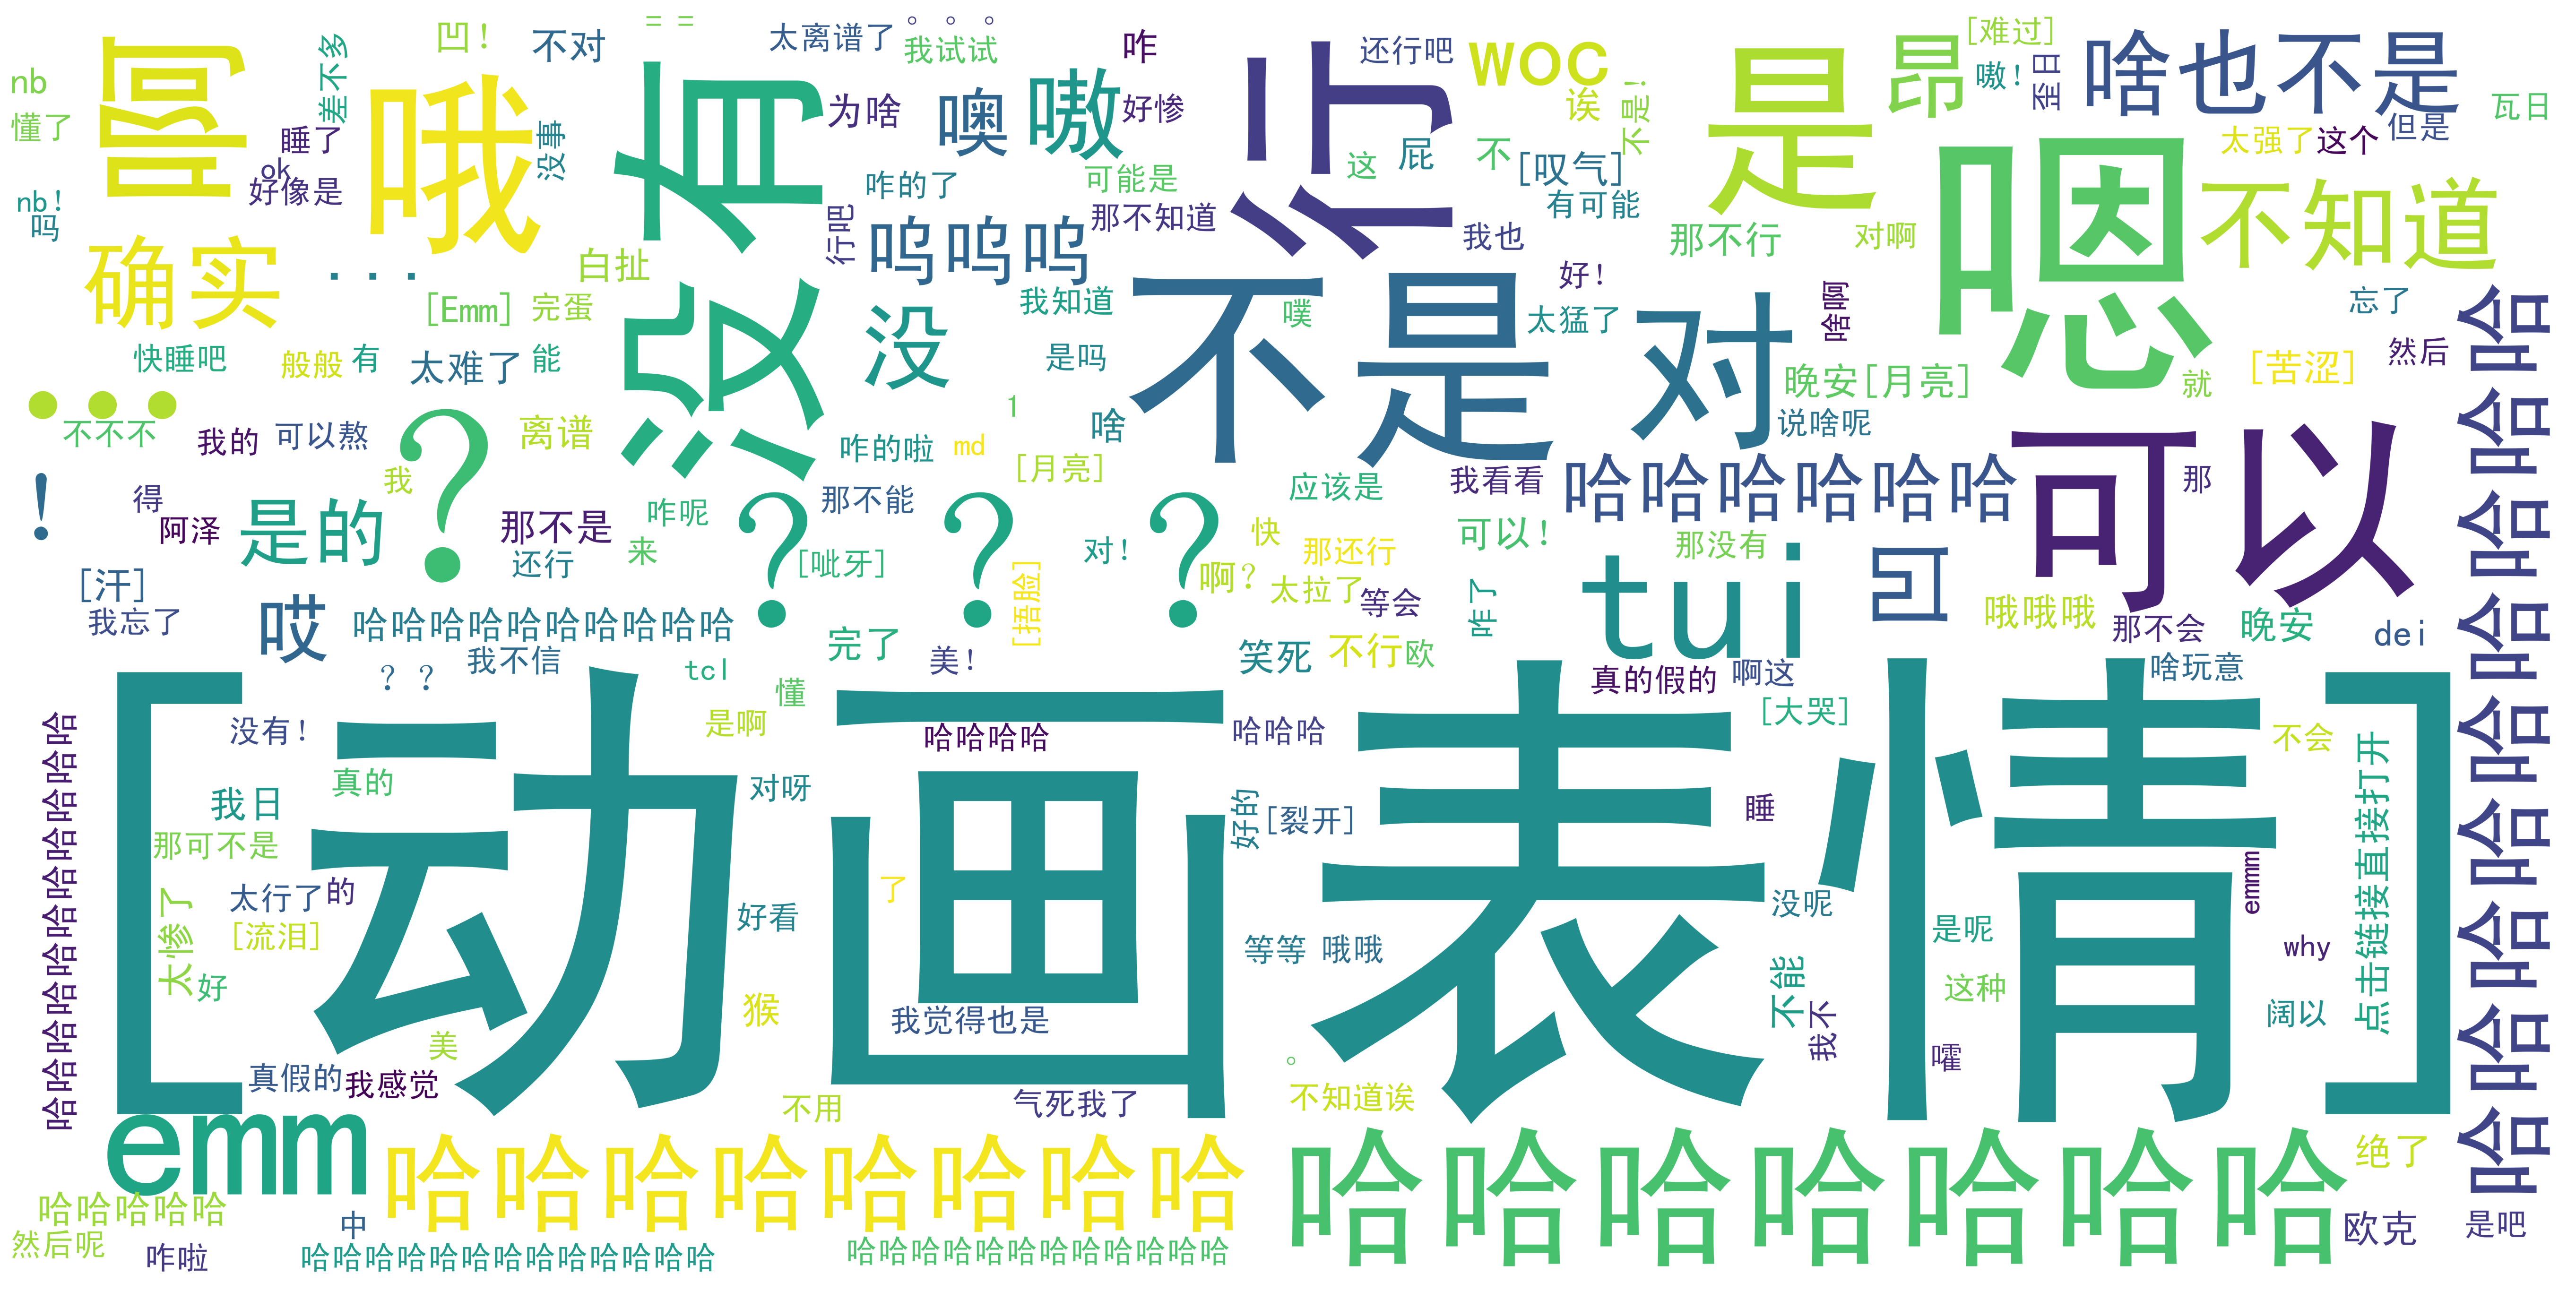

In [127]:
# 词云
words_count = pd.read_csv("un_split.csv")

import matplotlib
from imageio import imread
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (100.0, 50.0)

wordcloud = WordCloud(font_path="simhei.ttf",
                      background_color="white", max_font_size=80, scale=32)
word_frequence = {x[0]: x[1] for x in words_count.head(200).values}
wordcloud = wordcloud.fit_words(word_frequence)


plt.axis('off')
plt.imshow(wordcloud)

In [128]:
# 分词
import jieba
content_S = []
for line in data["内容"].values.tolist():
    current_segment = jieba.lcut(str(line))
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符\
        content_S.append(current_segment)
content_S

[['我',
  '通过',
  '了',
  '你',
  '的',
  '好友',
  '验证',
  '请求',
  '，',
  '现在',
  '我们',
  '可以',
  '开始',
  '聊天',
  '了'],
 ['搜微', '信号'],
 ['用手', '遮', '着', '是因为', '脸大嘛', '？'],
 ['我', '脸', '还', '大', '[', '饥饿', ']'],
 ['那', '为何', '捂脸'],
 ['心情', '好'],
 ['弄', '得', '我', '都', '哭', '了'],
 ['眼泪', '都', '流', '出来', '了'],
 ['为啥', ' ', '太美', '了', '对', '吧'],
 ['为啥', '不是', '吓哭', '的', '呢'],
 ['[', '委屈', ']'],
 ['美哭', '的', '，', '美哭', '的'],
 ['6', '嘛', '？'],
 ['我要', '爱', '上', '这个', '软件', '了'],
 ['足迹', '嘛'],
 ['还', '打错字', '了'],
 ['当时', '咱们', '合照', '时', '我', '就要', '用', '那个', '来', '着'],
 ['但是', '自拍杆', '插', '上', '没', '反应'],
 ['你', '可以', '先拍', '后射', '嘛'],
 ['高级', '吗'],
 ['ios', '所', '不能'],
 ['羡慕', '嘛'],
 ['再', '买', '一个', '吧'],
 ['[', '再见', ']'],
 ['我要', '去', '睡觉', '了', '你', '有', '什么', '想', '说', '的', '么'],
 ['没有', '[', '抠', '鼻', ']'],
 ['有', '！'],
 ['那好', '吧', '。', '。'],
 ['黑夜', '里', '最', '相思', '[', '月亮', ']'],
 ['说完', '了'],
 ['这个', '应该', '零点', '之后', '说'],
 ['今天', '你', '替', '我', '说', '了', '吧'],
 ['我', '这', '就', '去', 

In [129]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head(20)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [130]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(content_S,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

In [131]:
# 所有词
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,好友
1,验证
2,请求
3,聊天
4,搜微


In [134]:
# 存储所有词统计
df_all_words["all_words"].value_counts().to_csv("split.csv")

In [136]:
words_count=pd.read_csv("split.csv")
words_count

,Unnamed: 0,all_words
0,说,2995
1,哈哈哈,1472
2,想,1202
3,买,918
4,哈哈哈哈,801
...,...,...
26045,金帝,1
26046,按理说,1
26047,转来,1
26048,dane,1


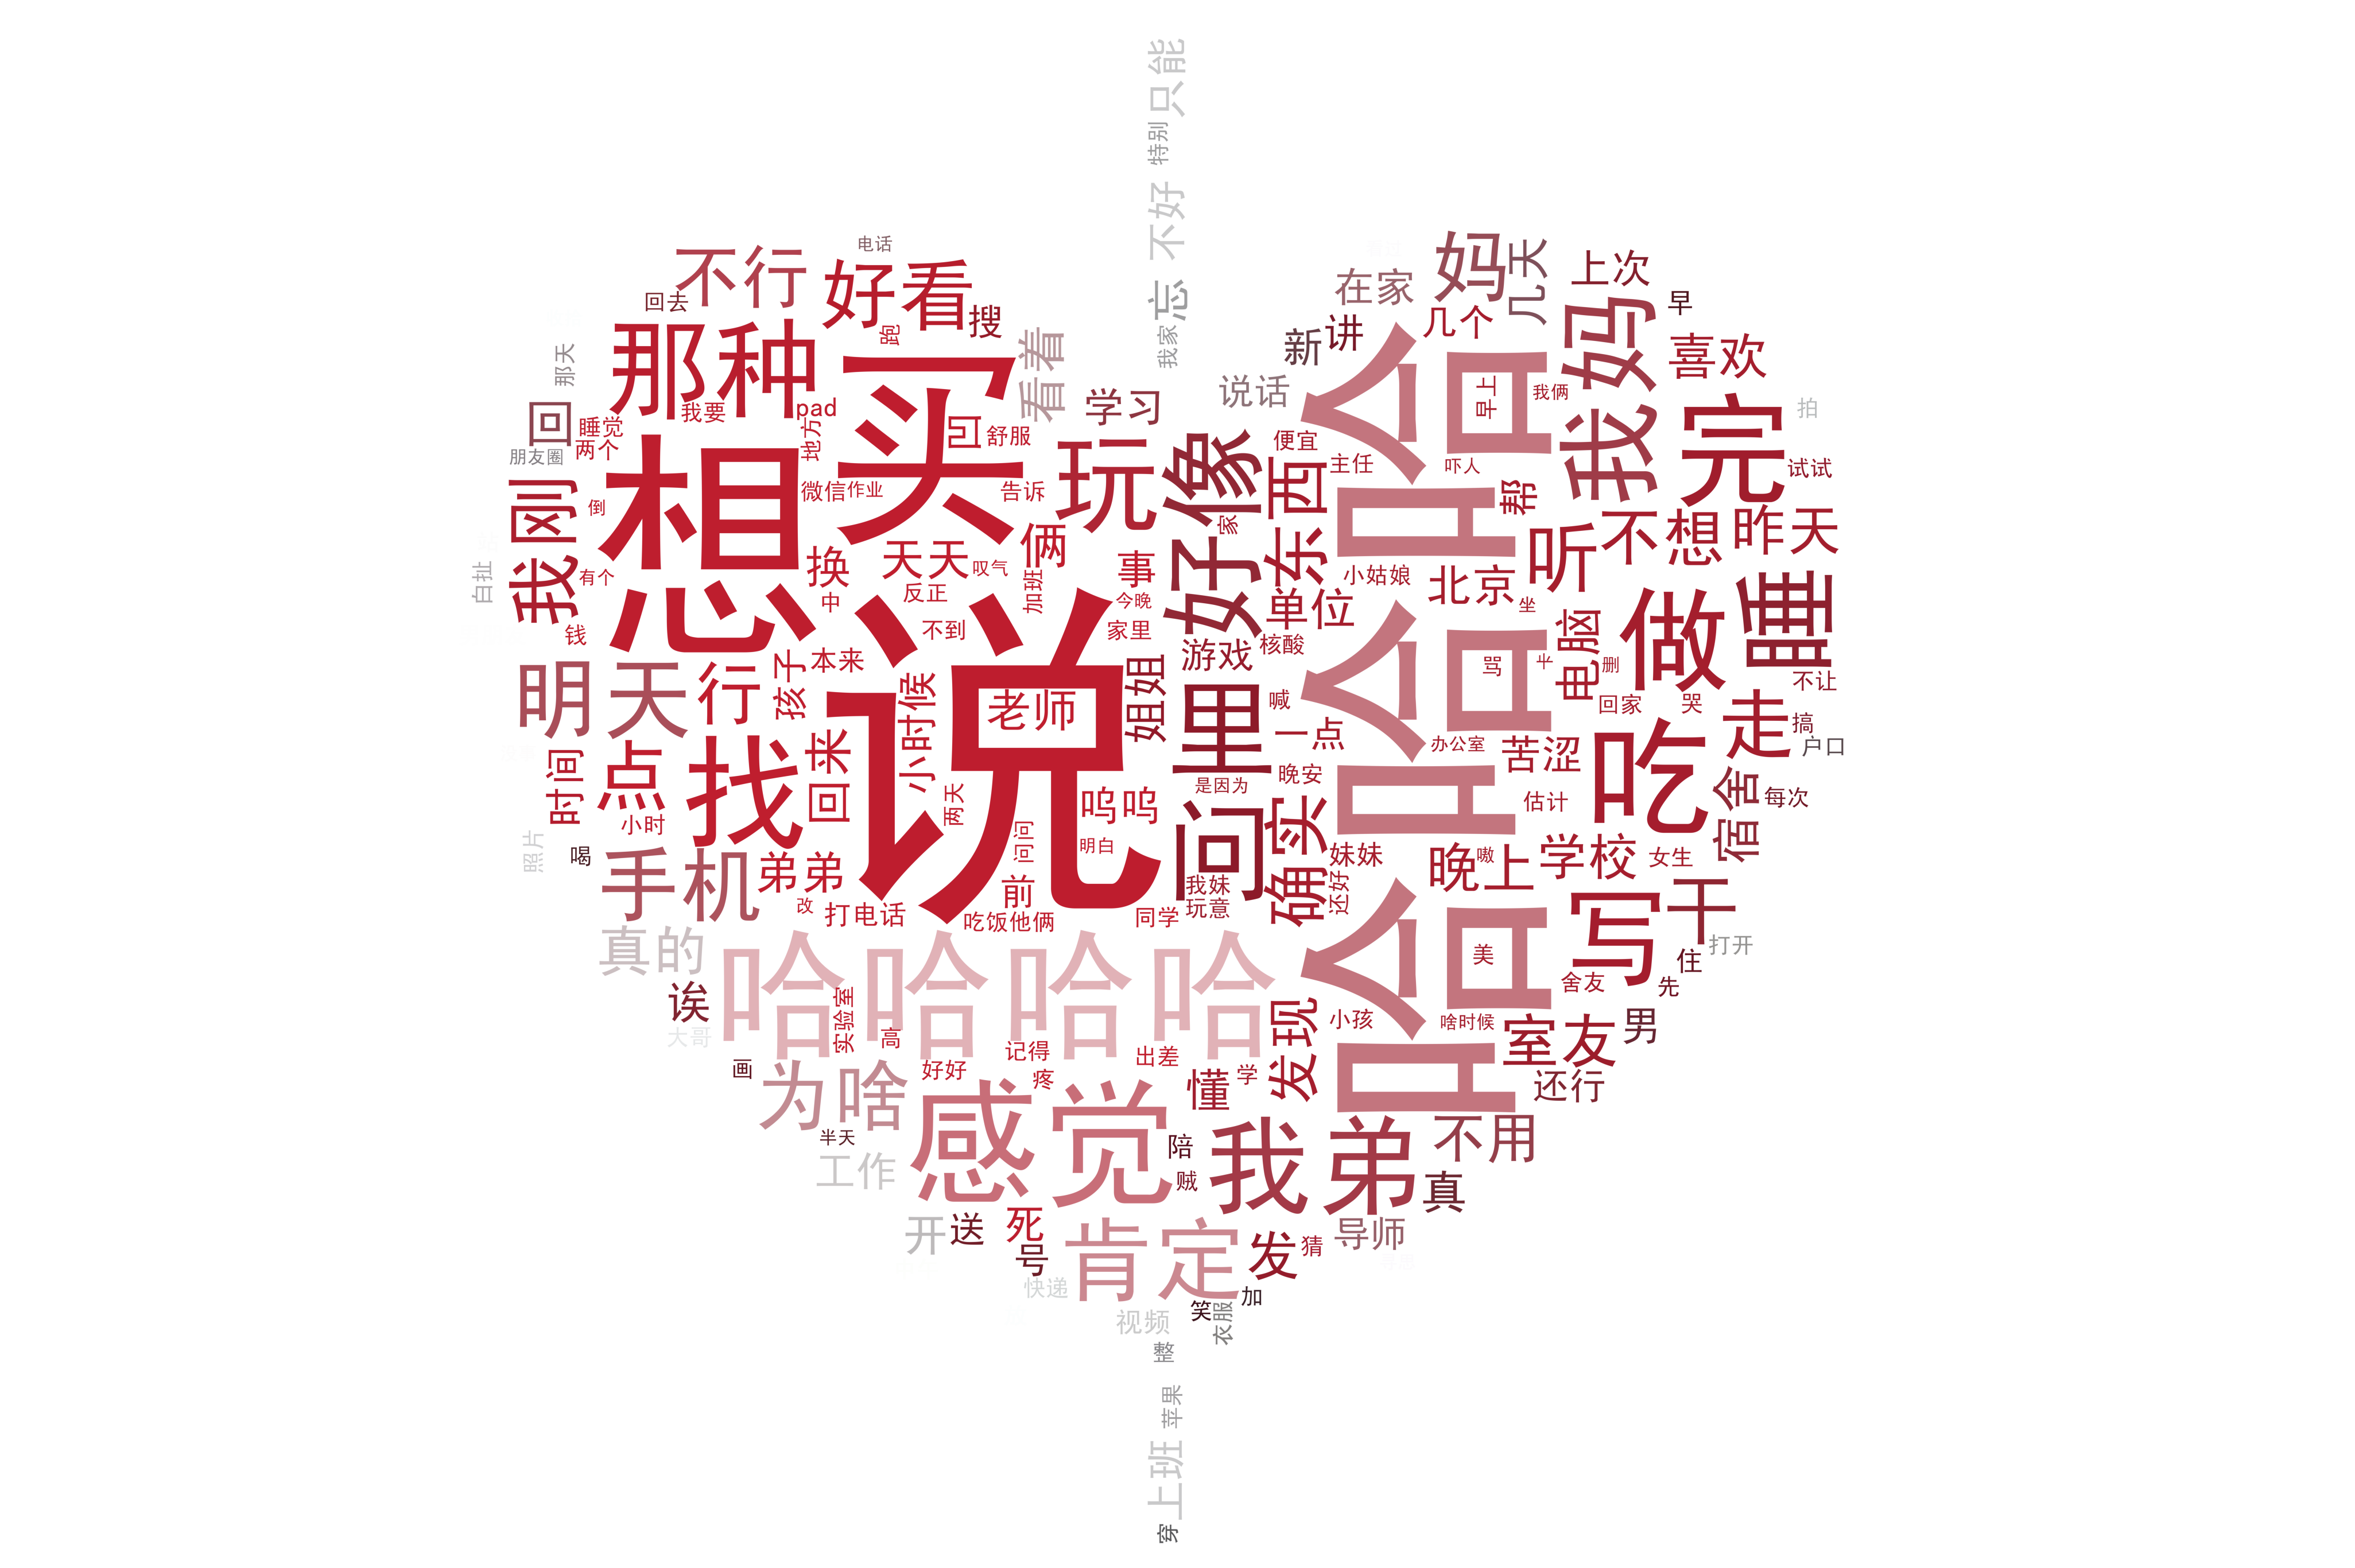

In [137]:
# 词云

import matplotlib
from imageio import imread
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (100.0, 50.0)

mask = imread("2.jpeg")

wordcloud = WordCloud(mask=mask, font_path="simhei.ttf",
                      background_color="white", max_font_size=80, scale=32)
word_frequence = {x[0]: x[1] for x in words_count.head(200).values}
wordcloud = wordcloud.fit_words(word_frequence)

img_color = ImageColorGenerator(mask)
wordcloud.recolor(color_func=img_color)

plt.axis('off')
plt.imshow(wordcloud)
